In [2]:
pip install requests pillow colorthief selenium webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [4]:
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

def scrape_amazon_laptops(num_laptops=1500):
    options = Options()
    options.add_argument('--headless')
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

    laptops = []
    page = 1

    while len(laptops) < num_laptops:
        url = f"https://www.amazon.com/s?k=laptops&page={page}"
        driver.get(url)

        try:
            WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.s-result-item")))
        except Exception as e:
            print(f"Error on page {page}: {e}")
            break

        items = driver.find_elements(By.CSS_SELECTOR, "div.s-result-item")

        for item in items:
            try:
                title = item.find_element(By.CSS_SELECTOR, "h2 a span").text
                price = item.find_element(By.CSS_SELECTOR, "span.a-price-whole").text
                specs = item.find_element(By.CSS_SELECTOR, "div.a-section.a-spacing-small").text
                warranty = "Check product page for warranty details"

                laptops.append({
                    'Title': title,
                    'Price': price,
                    'Specifications': specs,
                    'Warranty': warranty
                })

                if len(laptops) >= num_laptops:
                    break

            except Exception as e:
                print(f"Error processing item: {e}")
                continue

        page += 1
        time.sleep(2)  # Be respectful to the website

    driver.quit()
    return pd.DataFrame(laptops)

# Scrape laptop data
df = scrape_amazon_laptops()
df.to_csv('amazon_laptops.csv', index=False)
print(f"Scraped {len(df)} laptops")


Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span.a-price-whole"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlI

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"span.a-price-whole"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlI

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

Error processing item: Message: no such element: Unable to locate element: {"method":"css selector","selector":"h2 a span"}
  (Session info: chrome-headless-shell=126.0.6478.115); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	GetHandleVerifier [0x0105C1C3+27395]
	(No symbol) [0x00FF3DC4]
	(No symbol) [0x00EF1B7F]
	(No symbol) [0x00F32C65]
	(No symbol) [0x00F32D3B]
	(No symbol) [0x00F28D01]
	(No symbol) [0x00F539E4]
	(No symbol) [0x00F28C15]
	(No symbol) [0x00F53C34]
	(No symbol) [0x00F6CB24]
	(No symbol) [0x00F53736]
	(No symbol) [0x00F27541]
	(No symbol) [0x00F280BD]
	GetHandleVerifier [0x01313A93+2876371]
	GetHandleVerifier [0x01367F5D+3221661]
	GetHandleVerifier [0x010DD634+556916]
	GetHandleVerifier [0x010E474C+585868]
	(No symbol) [0x00FFCE04]
	(No symbol) [0x00FF9818]
	(No symbol) [0x00FF99B7]
	(No symbol) [0x00FEBF0E]
	BaseThreadInitThunk [0x76A47BA9+25]
	RtlInitialize

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('amazon_laptops.csv')

# Basic info
print(df.info())
print(df.describe())

# Clean the price column
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Extract some features from the specifications
df['RAM'] = df['Specifications'].str.extract(r'(\d+)\s*GB RAM')[0]
df['Storage_GB'] = df['Specifications'].str.extract(r'(\d+)\s*GB SSD')[0]
df['Storage_TB'] = df['Specifications'].str.extract(r'(\d+)\s*TB SSD')[0]
df['Processor'] = df['Specifications'].str.extract(r'(Intel|AMD)')[0]

# Combine the extracted storage columns into one
df['Storage_GB'] = pd.to_numeric(df['Storage_GB'], errors='coerce').fillna(0)
df['Storage_TB'] = pd.to_numeric(df['Storage_TB'], errors='coerce').fillna(0) * 1000
df['Storage'] = df['Storage_GB'] + df['Storage_TB']

# Clean up extracted features
df['RAM'] = pd.to_numeric(df['RAM'], errors='coerce')

# Remove rows with missing crucial information
df = df.dropna(subset=['Price', 'RAM', 'Storage', 'Processor'])
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           328 non-null    object
 1   Price           328 non-null    object
 2   Specifications  328 non-null    object
 3   Warranty        328 non-null    object
dtypes: object(4)
memory usage: 10.4+ KB
None
                                                    Title Price  \
count                                                 328   328   
unique                                                307   175   
top     Dell Inspiron 5635 Laptop - 16.0-inch 16:10 FH...   599   
freq                                                    2    10   

                                           Specifications  \
count                                                 328   
unique                                                319   
top     ACEMAGIC Laptop Computer 16 inch FHD Display, ...   
freq  

,Title,Price,Specifications,Warranty,RAM,Storage_GB,Storage_TB,Processor,Storage
0,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",298.0,"HP Stream 14"" HD BrightView Laptop, Intel Cele...",Check product page for warranty details,16.0,0.0,0.0,Intel,0.0
1,"HP Newest 14"" Ultral Light Laptop for Students...",249.0,"HP Newest 14"" Ultral Light Laptop for Students...",Check product page for warranty details,8.0,0.0,0.0,Intel,0.0
2,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",491.0,"HP 17 Laptop, 17.3” HD+ Display, 11th Gen Inte...",Check product page for warranty details,32.0,0.0,1000.0,Intel,1000.0
3,"HP 15.6"" Portable Laptop (Include 1 Year Micro...",307.0,"HP 15.6"" Portable Laptop (Include 1 Year Micro...",Check product page for warranty details,16.0,0.0,0.0,Intel,0.0
5,"Lenovo IdeaPad 1 Student Laptop, Intel Dual Co...",389.0,"Lenovo IdeaPad 1 Student Laptop, Intel Dual Co...",Check product page for warranty details,20.0,0.0,1000.0,Intel,1000.0
...,...,...,...,...,...,...,...,...,...
307,"HP Essential 255 G8 Laptop, 15.6"" FHD Display,...",549.0,"Sponsored\nHP Essential 255 G8 Laptop, 15.6"" F...",Check product page for warranty details,32.0,0.0,0.0,AMD,0.0
308,Gaming Laptop with AMD Ryzen 7 5700U Processor...,649.0,Sponsored\nGaming Laptop with AMD Ryzen 7 5700...,Check product page for warranty details,16.0,0.0,0.0,AMD,0.0
310,"Lenovo IdeaPad 3 15.6"" FHD Touchscreen Laptop,...",699.0,"Sponsored\nLenovo IdeaPad 3 15.6"" FHD Touchscr...",Check product page for warranty details,24.0,0.0,0.0,Intel,0.0
320,"HP Laptop, 17.3"" FHD Business and Student Lapt...",699.0,"Sponsored\nHP Laptop, 17.3"" FHD Business and S...",Check product page for warranty details,32.0,0.0,1000.0,Intel,1000.0


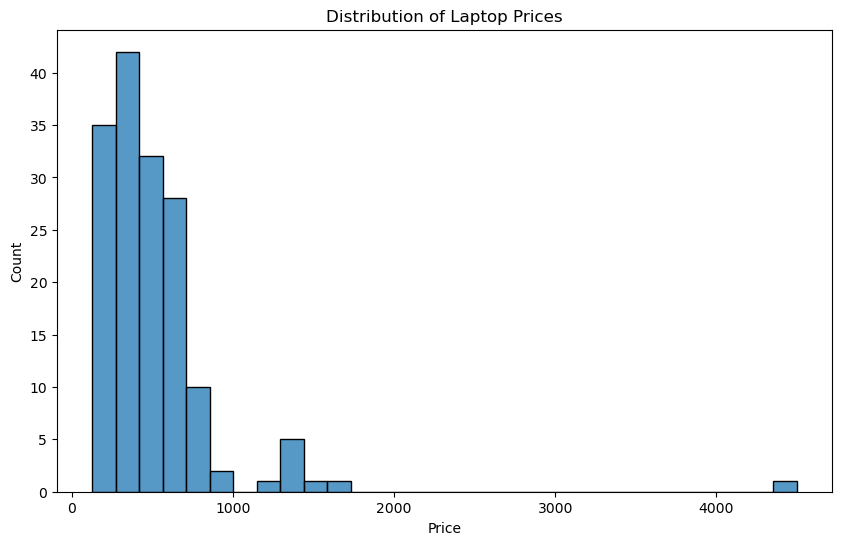

In [7]:
# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30)
plt.title('Distribution of Laptop Prices')
plt.show()

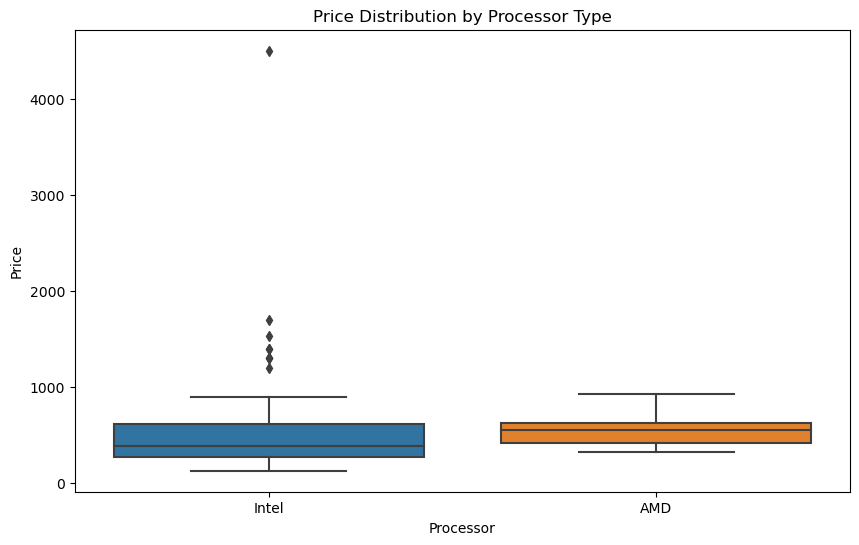

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Processor', y='Price', data=df)
plt.title('Price Distribution by Processor Type')
plt.show()


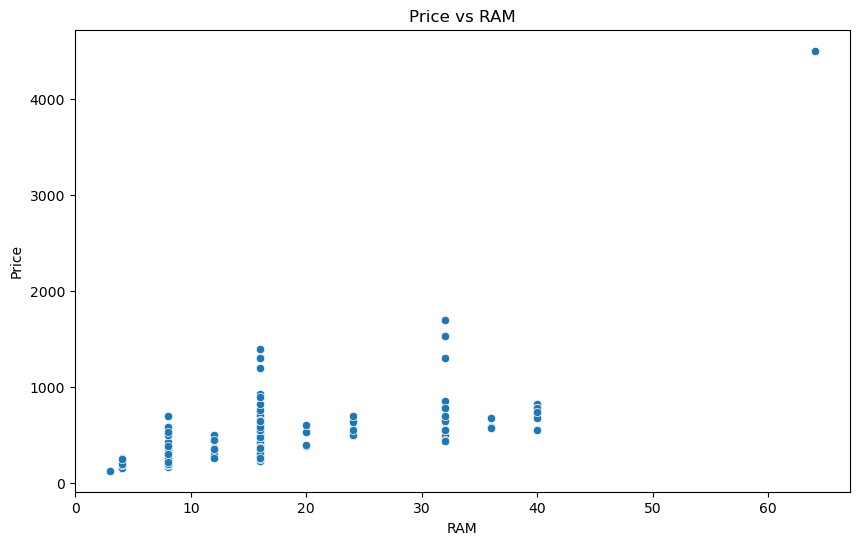

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Price', data=df)
plt.title('Price vs RAM')
plt.show()

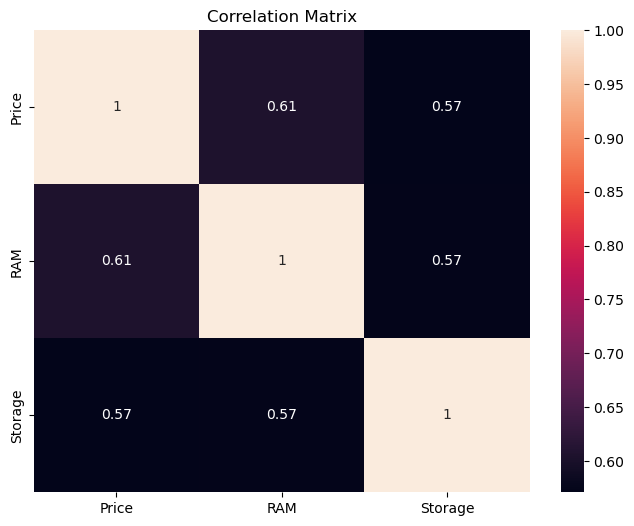

In [10]:
# Correlation matrix
corr_matrix = df[['Price', 'RAM', 'Storage']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


In [12]:
# Price distribution
print("Price Statistics:")
print(df['Price'].describe())

# Correlation between Price and RAM/Storage
print("\nCorrelation with Price:")
print(df[['Price', 'RAM', 'Storage']].corr()['Price'])

# Processor type impact
intel_prices = df[df['Processor'] == 'Intel']['Price']
amd_prices = df[df['Processor'] == 'AMD']['Price']

from scipy import stats
t_stat, p_value = stats.ttest_ind(intel_prices, amd_prices)
print("\nT-test for Intel vs AMD prices:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Price Statistics:
count     158.000000
mean      512.968354
std       424.262424
min       127.000000
25%       295.000000
50%       426.000000
75%       614.000000
max      4499.000000
Name: Price, dtype: float64

Correlation with Price:
Price      1.000000
RAM        0.606102
Storage    0.570980
Name: Price, dtype: float64

T-test for Intel vs AMD prices:
T-statistic: -0.36208633550271846
P-value: 0.7177775330384776


In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Prepare the data
X = df[['RAM', 'Storage', 'Processor']]
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['RAM', 'Storage']),
        ('cat', OneHotEncoder(drop='first'), ['Processor'])
    ])

# Create a model pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10]
}


In [20]:
# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_


In [25]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred

array([290.62796446, 290.62796446, 482.0117752 , 805.56717099,
       592.16736873, 758.01386287, 330.56099637, 704.84462623,
       199.57709558, 199.57709558, 592.16736873, 805.56717099,
       482.0117752 , 482.0117752 , 348.7214536 , 411.61627133,
       442.62689008, 481.99605857, 199.57709558, 592.16736873,
       199.57709558, 482.0117752 , 381.82849813, 199.57709558,
       592.16736873, 442.62689008, 482.0117752 , 529.09426835,
       442.62689008, 330.56099637, 199.57709558, 782.69587514])

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Best Parameters: {'regressor__max_depth': None, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 200}
Mean Squared Error: 55575.63691622481
R-squared Score: 0.41032061384884333


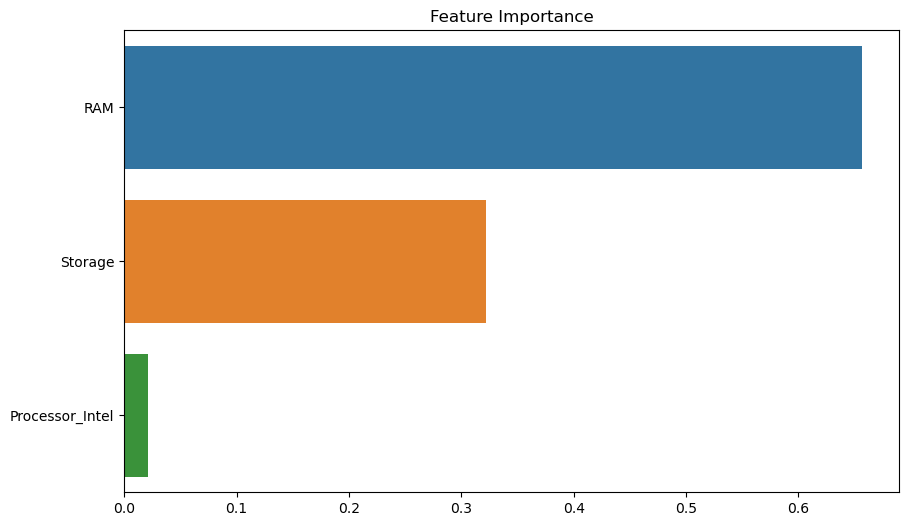

In [24]:
# Feature importance
feature_importance = best_model.named_steps['regressor'].feature_importances_
feature_names = (best_model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .get_feature_names_out(['Processor']).tolist())
feature_names = ['RAM', 'Storage'] + feature_names

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.show()
